<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PREPARE-DATA" data-toc-modified-id="PREPARE-DATA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>PREPARE DATA</a></span><ul class="toc-item"><li><span><a href="#DATASET" data-toc-modified-id="DATASET-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>DATASET</a></span></li><li><span><a href="#TARGET" data-toc-modified-id="TARGET-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>TARGET</a></span></li><li><span><a href="#FEATURES" data-toc-modified-id="FEATURES-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>FEATURES</a></span></li><li><span><a href="#TRAIN-TEST-SPLIT" data-toc-modified-id="TRAIN-TEST-SPLIT-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>TRAIN TEST SPLIT</a></span></li></ul></li><li><span><a href="#LOGISTIC-REGRESSION" data-toc-modified-id="LOGISTIC-REGRESSION-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>LOGISTIC REGRESSION</a></span><ul class="toc-item"><li><span><a href="#TRAINING" data-toc-modified-id="TRAINING-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>TRAINING</a></span></li><li><span><a href="#TEST" data-toc-modified-id="TEST-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>TEST</a></span></li><li><span><a href="#VALIDATION" data-toc-modified-id="VALIDATION-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>VALIDATION</a></span></li><li><span><a href="#PACKING-TO-EVALUATE-OTHER-ALGORITHMS" data-toc-modified-id="PACKING-TO-EVALUATE-OTHER-ALGORITHMS-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>PACKING TO EVALUATE OTHER ALGORITHMS</a></span></li></ul></li><li><span><a href="#K-NEAREST-NEIGHBORS" data-toc-modified-id="K-NEAREST-NEIGHBORS-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>K-NEAREST NEIGHBORS</a></span></li><li><span><a href="#SUPPORT-VECTOR--MACHINE" data-toc-modified-id="SUPPORT-VECTOR--MACHINE-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>SUPPORT VECTOR  MACHINE</a></span></li><li><span><a href="#DECISION-TREE" data-toc-modified-id="DECISION-TREE-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>DECISION TREE</a></span></li><li><span><a href="#RANDOM-FOREST" data-toc-modified-id="RANDOM-FOREST-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>RANDOM FOREST</a></span></li><li><span><a href="#CONCLUSIONS" data-toc-modified-id="CONCLUSIONS-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>CONCLUSIONS</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
%matplotlib inline
import os

## PREPARE DATA

### DATASET

Mientras termino de hacer las consultas a la API de Python, empiezo a trabajar en un baseline con los datos de 2020 y enero de 2021 para las dimensiones y métricas númericas disponibles.

In [2]:
!ls ../data/

df_pDepth_Scount_daysSLS_srceMed_2019.csv
df_pDepth_Scount_daysSLS_srceMed_2020.csv
df_pDepth_Scount_daysSLS_srceMed_apr19.csv
df_pDepth_Scount_daysSLS_srceMed_apr20.csv
df_pDepth_Scount_daysSLS_srceMed_aug19.csv
df_pDepth_Scount_daysSLS_srceMed_aug20.csv
df_pDepth_Scount_daysSLS_srceMed_dec19.csv
df_pDepth_Scount_daysSLS_srceMed_dec20.csv
df_pDepth_Scount_daysSLS_srceMed_feb20.csv
df_pDepth_Scount_daysSLS_srceMed_jan20.csv
df_pDepth_Scount_daysSLS_srceMed_jan21.csv
df_pDepth_Scount_daysSLS_srceMed_jul19.csv
df_pDepth_Scount_daysSLS_srceMed_jul20.csv
df_pDepth_Scount_daysSLS_srceMed_jun19.csv
df_pDepth_Scount_daysSLS_srceMed_jun20.csv
df_pDepth_Scount_daysSLS_srceMed_mar20.csv
df_pDepth_Scount_daysSLS_srceMed_may19.csv
df_pDepth_Scount_daysSLS_srceMed_may20.csv
df_pDepth_Scount_daysSLS_srceMed_nov19.csv
df_pDepth_Scount_daysSLS_srceMed_nov20.csv
df_pDepth_Scount_daysSLS_srceMed_oct19.csv
df_pDepth_Scount_daysSLS_srceMed_oct20.csv
df_pDepth_Scount_daysSLS_srceMed_sep19.csv
df_pDepth_Sco

In [2]:
data_root="../data/"

datafile_2020=os.path.join(data_root,'df_pDepth_Scount_daysSLS_srceMed_2020.csv')
datafile_jan21=os.path.join(data_root,'df_pDepth_Scount_daysSLS_srceMed_jan21.csv')

df_pDepth_Scount_daysSLS_srceMed_2020=pd.read_csv(datafile_2020)
print(df_pDepth_Scount_daysSLS_srceMed_2020.shape)
df_pDepth_Scount_daysSLS_srceMed_jan21=pd.read_csv(datafile_jan21)
print(df_pDepth_Scount_daysSLS_srceMed_jan21.shape)

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(2885547, 13)
(983598, 12)


/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_pDepth_Scount_daysSLS_srceMed_2020.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ga:productSKU', 'ga:pagePath',
       'ga:dateHourMinute', 'ga:pageDepth', 'ga:sessionCount',
       'ga:daysSinceLastSession', 'ga:sourceMedium', 'ga:productListViews',
       'ga:productListClicks', 'ga:productDetailViews',
       'ga:productAddsToCart'],
      dtype='object')

In [4]:
df_pDepth_Scount_daysSLS_srceMed_jan21.columns

Index(['Unnamed: 0', 'ga:productSKU', 'ga:pagePath', 'ga:dateHourMinute',
       'ga:pageDepth', 'ga:sessionCount', 'ga:daysSinceLastSession',
       'ga:sourceMedium', 'ga:productListViews', 'ga:productListClicks',
       'ga:productDetailViews', 'ga:productAddsToCart'],
      dtype='object')

In [6]:
df_pDepth_Scount_daysSLS_srceMed_2020.head()

,Unnamed: 0,Unnamed: 0.1,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart
0,0,0,1000,/parafarmacia/es/1000-heliocare-360-pediatrics...,202001141125,12,407,0,google / organic,0,1,1,0
1,1,1,1000,/parafarmacia/es/1000-heliocare-360-pediatrics...,202001141345,5,3,0,(direct) / (none),0,0,1,0
2,2,2,1001,/parafarmacia/es/1001-heliocare-caps-60-caps.html,202001080932,6,3,19,google / organic,0,1,1,0
3,3,3,1002,/parafarmacia/es/147-champus,202001161511,14,1,0,google / cpc,2,0,0,0
4,4,4,1002,/parafarmacia/es/147-champus,202001162342,14,3,0,google / cpc,1,0,0,0


In [7]:
df_pDepth_Scount_daysSLS_srceMed_2020.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)
df_pDepth_Scount_daysSLS_srceMed_2020.shape

(2885547, 11)

In [8]:
df_pDepth_Scount_daysSLS_srceMed_jan21.drop('Unnamed: 0', axis=1, inplace=True)
df_pDepth_Scount_daysSLS_srceMed_jan21.shape

(983598, 11)

In [9]:
df_mvp = pd.concat([df_pDepth_Scount_daysSLS_srceMed_2020,df_pDepth_Scount_daysSLS_srceMed_jan21])
df_mvp.shape

(3869145, 11)

In [10]:
df_mvp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3869145 entries, 0 to 983597
Data columns (total 11 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   ga:productSKU            object
 1   ga:pagePath              object
 2   ga:dateHourMinute        object
 3   ga:pageDepth             object
 4   ga:sessionCount          object
 5   ga:daysSinceLastSession  object
 6   ga:sourceMedium          object
 7   ga:productListViews      int64 
 8   ga:productListClicks     int64 
 9   ga:productDetailViews    int64 
 10  ga:productAddsToCart     int64 
dtypes: int64(4), object(7)
memory usage: 354.2+ MB


In [11]:
df_mvp["ga:pageDepth"]=pd.to_numeric(df_mvp["ga:pageDepth"])
df_mvp["ga:sessionCount"]=pd.to_numeric(df_mvp["ga:sessionCount"])
df_mvp["ga:daysSinceLastSession"]=pd.to_numeric(df_mvp["ga:daysSinceLastSession"])

ValueError: Unable to parse string "(other)" at position 2885547

In [12]:
df_mvp.iloc[2885547]

ga:productSKU              (other)
ga:pagePath                (other)
ga:dateHourMinute          (other)
ga:pageDepth               (other)
ga:sessionCount            (other)
ga:daysSinceLastSession    (other)
ga:sourceMedium            (other)
ga:productListViews          53386
ga:productListClicks           215
ga:productDetailViews         3050
ga:productAddsToCart           265
Name: 0, dtype: object

In [15]:
df_mvp.drop(df_mvp.index[2885547], inplace=True)

In [16]:
df_mvp["ga:pageDepth"]=pd.to_numeric(df_mvp["ga:pageDepth"])
df_mvp["ga:sessionCount"]=pd.to_numeric(df_mvp["ga:sessionCount"])
df_mvp["ga:daysSinceLastSession"]=pd.to_numeric(df_mvp["ga:daysSinceLastSession"])

In [17]:
df_mvp.dtypes

ga:productSKU              object
ga:pagePath                object
ga:dateHourMinute          object
ga:pageDepth                int64
ga:sessionCount             int64
ga:daysSinceLastSession     int64
ga:sourceMedium            object
ga:productListViews         int64
ga:productListClicks        int64
ga:productDetailViews       int64
ga:productAddsToCart        int64
dtype: object

In [18]:
data = df_mvp.select_dtypes('number')
data.columns

Index(['ga:pageDepth', 'ga:sessionCount', 'ga:daysSinceLastSession',
       'ga:productListViews', 'ga:productListClicks', 'ga:productDetailViews',
       'ga:productAddsToCart'],
      dtype='object')

### TARGET

In [19]:
data["ga:productAddsToCart"].value_counts()

0     3804874
1       63465
2         650
3          75
4          29
5          20
6          10
7           9
8           2
9           2
11          2
12          2
10          1
13          1
24          1
Name: ga:productAddsToCart, dtype: int64

In [20]:
data["ga:productAddsToCart_fast_transf"]=data["ga:productAddsToCart"].apply(lambda x: 1 if x>1 else x)

<ipython-input-20-362db5b4b282>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ga:productAddsToCart_fast_transf"]=data["ga:productAddsToCart"].apply(lambda x: 1 if x>1 else x)


In [21]:
data["ga:productAddsToCart_fast_transf"].value_counts()

0    3804874
1      64269
Name: ga:productAddsToCart_fast_transf, dtype: int64

In [22]:
y = data['ga:productAddsToCart_fast_transf']

### FEATURES

In [23]:
X = data[data.columns[0:-2]]
X.columns

Index(['ga:pageDepth', 'ga:sessionCount', 'ga:daysSinceLastSession',
       'ga:productListViews', 'ga:productListClicks', 'ga:productDetailViews'],
      dtype='object')

### TRAIN TEST SPLIT

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)
X_train.shape, X_test.shape

#I have included random_state param in order to warranty replicability

((2901857, 6), (967286, 6))

## LOGISTIC REGRESSION

### TRAINING

In [14]:
from sklearn.linear_model import LogisticRegression
clfl=LogisticRegression()
clfl.fit(X_train,y_train)

LogisticRegression()

In [15]:
clfl.score(X_train,y_train)

0.9940669026764586

### TEST

In [16]:
predictions = clfl.predict(X_test)
probabilities = clfl.predict_proba(X_test)

In [17]:
probabilities

array([[9.99997711e-01, 2.28901438e-06],
       [9.98993057e-01, 1.00694326e-03],
       [9.98676511e-01, 1.32348855e-03],
       ...,
       [9.99829768e-01, 1.70232490e-04],
       [9.98297792e-01, 1.70220755e-03],
       [9.99162310e-01, 8.37690269e-04]])

ACCURACY: 0.9940482959538337
PRECISION: 0.9954404346138921
RECALL: 0.6424769895435477
F1 SCORE: 0.780927736976293
AUC: 0.9264391652120458


Text(0, 0.5, 'tpr')

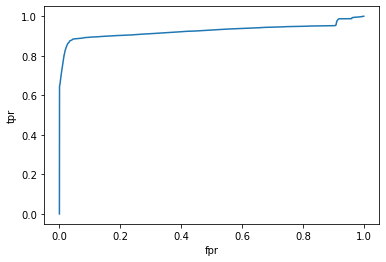

In [18]:
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, roc_curve, accuracy_score

print("ACCURACY: " + str(accuracy_score(y_test, predictions)))
print("PRECISION: " + str(precision_score(y_test, predictions)))
print("RECALL: " + str(recall_score(y_test, predictions)))
print("F1 SCORE: " + str(f1_score(y_test, predictions)))
print("AUC: " + str(roc_auc_score(y_test,probabilities[:, 1])))

tpr, fpr, thresolds = roc_curve(y_test, probabilities[:, 1])
plt.plot(tpr, fpr)
plt.xlabel('fpr')
plt.ylabel('tpr')

In [19]:
from sklearn.metrics import confusion_matrix

clfl_cm = confusion_matrix(y_test,predictions)
clfl_cm

array([[951268,     47],
       [  5710,  10261]])

<AxesSubplot:>

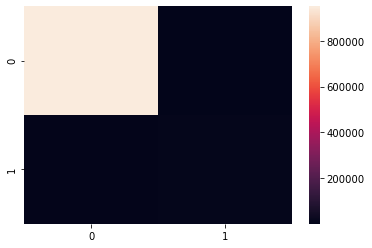

In [20]:
sns.heatmap(clfl_cm)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clfl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    951315
           1       1.00      0.64      0.78     15971

    accuracy                           0.99    967286
   macro avg       0.99      0.82      0.89    967286
weighted avg       0.99      0.99      0.99    967286



Esta primera regresión Logística está dando buenos resultados en general. Sin embargo, su principal punto débil son los Falsos Negativos tal y como nos indica la métrica Recall. De cara a la toma de decisiones, esto puede suponer costes de oportunidad muy elevados, por estar omitiendo del modelo algunos usuarios con potencial de convertir.

### VALIDATION

In [22]:
from sklearn.model_selection import cross_val_score
crossval_scores=cross_val_score(clfl,X,y,scoring='recall')

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
crossval_scores

array([0.99844406, 0.99502101, 0.6578497 , 0.26810861, 0.30597479])

In [24]:
crossval_scores.mean()

0.6450796344890739

(array([2., 0., 0., 0., 0., 1., 0., 0., 0., 2.]),
 array([0.26810861, 0.34114216, 0.4141757 , 0.48720925, 0.56024279,
        0.63327634, 0.70630988, 0.77934343, 0.85237697, 0.92541052,
        0.99844406]),
 <BarContainer object of 10 artists>)

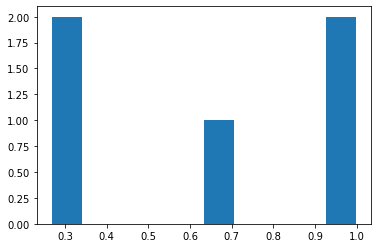

In [25]:
plt.hist(crossval_scores)

El resultado medio de recall en la validación es similar aunque observamos 2 iteraciones en las que el recall es muy elevado, otras 2 donde es muy bajo y una última donde tenemos 66% de True Positives sobre el total de positivos reales. 

### PACKING TO EVALUATE OTHER ALGORITHMS

In [25]:
def evaluate(classifier,features,target):
    X_train, X_test, y_train, y_test = train_test_split(features, target,random_state=42)
    classifier.fit(X_train,y_train)
    predictions = classifier.predict(X_test)
    probabilities = classifier.predict_proba(X_test)
    print("TRAINING SCORE: " + str(classifier.score(X_train,y_train)))
    print("ACCURACY: " + str(accuracy_score(y_test, predictions)))
    print("PRECISION: " + str(precision_score(y_test, predictions)))
    print("RECALL: " + str(recall_score(y_test, predictions)))
    print("F1 SCORE: " + str(f1_score(y_test, predictions)))
    print("AUC: " + str(roc_auc_score(y_test,probabilities[:, 1])))

    tpr, fpr, thresolds = roc_curve(y_test, probabilities[:, 1])
    plt.plot(tpr, fpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')

TRAINING SCORE0.9940669026764586
ACCURACY: 0.9940482959538337
PRECISION: 0.9954404346138921
RECALL: 0.6424769895435477
F1 SCORE: 0.780927736976293
AUC: 0.9264391652120458


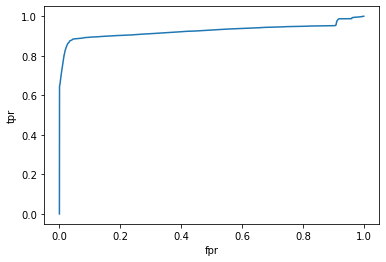

In [65]:
evaluate(clfl,X,y)

In [26]:
def validation(classifier,features,target,metric="recall",cv=5):
    crossval_scores=cross_val_score(classifier,features,target,scoring=metric)
    print("Score per iteration: " + str(crossval_scores))
    print("Mean: " + str(crossval_scores.mean()))
    plt.hist(crossval_scores) 

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score per iteration: [0.99844406 0.99502101 0.6578497  0.26810861 0.30597479]
Mean: 0.6450796344890739


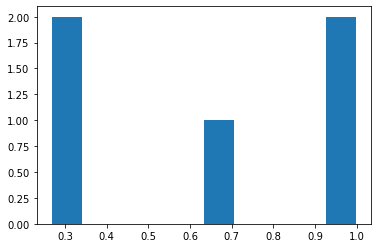

In [73]:
validation(clfl,X,y,"recall")

## K-NEAREST NEIGHBORS

TRAINING SCORE: 0.993391473115319
ACCURACY: 0.992484125687749
PRECISION: 0.9560750602788552
RECALL: 0.5710350009392023
F1 SCORE: 0.7150137201097609
AUC: 0.8511616391987036


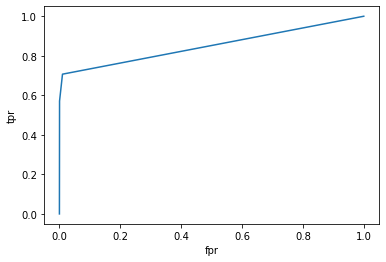

In [35]:
from sklearn.neighbors import KNeighborsClassifier
clfk=KNeighborsClassifier(n_neighbors=2)
evaluate(clfk,X,y)

In [36]:
print(classification_report(y_test,clfk.predict(X_test)))
clfk_cm = confusion_matrix(y_test,clfk.predict(X_test))
clfk_cm

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    951315
           1       0.96      0.57      0.72     15971

    accuracy                           0.99    967286
   macro avg       0.97      0.79      0.86    967286
weighted avg       0.99      0.99      0.99    967286



array([[950896,    419],
       [  6851,   9120]])

In [ ]:
validation(clfk,X,y,"recall")

## SUPPORT VECTOR  MACHINE

In [ ]:
from sklearn.svm import SVC
clfs=SVC(kernel="linear",C=10)
evaluate(clfs,X,y)

In [ ]:
print(classification_report(y_test,clfs.predict(X_test)))
clfs_cm = confusion_matrix(y_test,clfs.predict(X_test))
clfs_cm

In [ ]:
validation(clfs,X,y,"recall")

## DECISION TREE

In [27]:
from sklearn.tree import DecisionTreeClassifier

TRAINING SCORE: 0.9944142664507589
ACCURACY: 0.99391803458336
PRECISION: 0.9685990338164251
RECALL: 0.6528082148894871
F1 SCORE: 0.7799513746025808
AUC: 0.9513572045334545


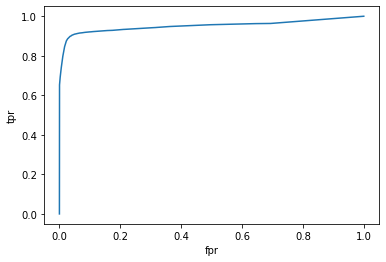

In [31]:
clfd=DecisionTreeClassifier()
evaluate(clfd,X,y)

In [32]:
print(classification_report(y_test,clfd.predict(X_test)))
clfd_cm = confusion_matrix(y_test,clfd.predict(X_test))
clfd_cm

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    951315
           1       0.97      0.65      0.78     15971

    accuracy                           0.99    967286
   macro avg       0.98      0.83      0.89    967286
weighted avg       0.99      0.99      0.99    967286



array([[950977,    338],
       [  5545,  10426]])

In [ ]:
validation(clfd,X,y,"recall")

## RANDOM FOREST

TRAINING SCORE: 0.994413577236921
ACCURACY: 0.9939593873993834
PRECISION: 0.9708945508647945
RECALL: 0.6537474171936635
F1 SCORE: 0.7813657623947615
AUC: 0.9601637375181166


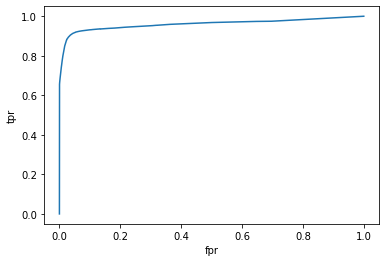

In [32]:
from sklearn.ensemble import RandomForestClassifier
clfr=RandomForestClassifier()
evaluate(clfr,X,y)

In [33]:
print(classification_report(y_test,clfr.predict(X_test)))
clfr_cm = confusion_matrix(y_test,clfr.predict(X_test))
clfr_cm

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    951315
           1       0.97      0.65      0.78     15971

    accuracy                           0.99    967286
   macro avg       0.98      0.83      0.89    967286
weighted avg       0.99      0.99      0.99    967286



array([[951002,    313],
       [  5530,  10441]])

## CONCLUSIONS

A la vista de los resultados, optaré por un modelo de Regresión Logistica. En principio, no se observan diferencias significativas en términos de rendimiento con respecto al resto de modelos. En cambio, con la Regreesión Logistica ganamos en interpretabilidad. Recordemos que el propósito de este proyecto no es sólo predecir sino también entender los factores que influyen en la conversión, con el fin de establecer hipotesis e implementar AB Testing. 

Por otra parte, el gasto computacional frente al resto de modelos también es muy inferior por lo que ganaremos en agilidad y raṕidez en el ajuste y optimización del modelo.  